# Objective

**Day 19 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 19. global change**
    
Data used: https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/sea-level-data/

# Setup

In [2]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
filepath = '../../SL_Plots/Data/jb_iby_sry_gtn_giy.nc'
sl = xr.open_dataset(filepath)
# read variables
lats = sl.variables['lat'].values
lons = sl.variables['lon'].values
date = sl.variables['time'].values
height = sl.variables['height'].values # sea level height
gmsl = sl.variables['gmsl'].values # global mean sea level
#sl.close()

# Prepare Data

In [8]:
# subtract global mean for each time step
height_minus_gm = np.zeros(shape=(len(date),len(lats),len(lons)))
for i in range(len(lats)):
    for j in range(len(lons)):
        height_minus_gm[:,i,j] = height[:,i,j] - gmsl[:]

In [10]:
# linear trend over entire time period
# to get the mean trend per year the regression coefficient has to be multiplied by 12
y = np.array(height_minus_gm)
X = np.arange(1,len(date)+1,1).reshape(-1, 1)
trend = np.zeros(shape=(len(lats),len(lons)))

for i in range(len(lats)):
    for j in range(len(lons)):
        if(np.isnan(y[0,i,j])):
            trend[i,j] = np.nan
        else:
            reg = LinearRegression().fit(X, y[:,i,j])
            trend[i,j] = reg.coef_

# Plot linear Trend

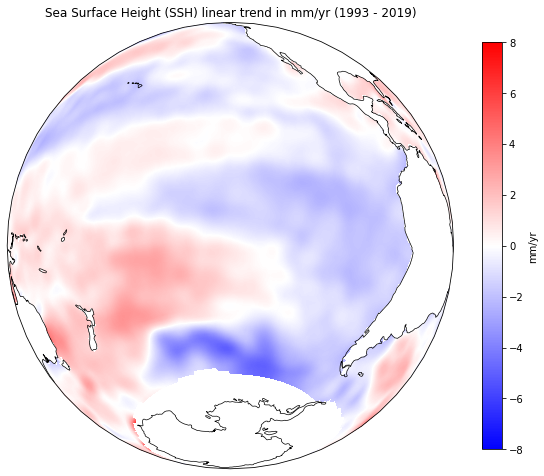

In [16]:
cmap = plt.cm.bwr
levels = np.arange(-8,8,0.01)
norm = mpl.colors.Normalize(vmin=-8, vmax=8)

PROJECTION = ccrs.Orthographic(central_longitude=-130, central_latitude=-30)
llons, llats = np.meshgrid(lons, lats)

fig, ax = plt.subplots(1, 1, figsize=(10,15))
ax = plt.subplot(111, projection=PROJECTION)
ax.set_title('Sea Surface Height (SSH) linear trend in mm/yr (1993 - 2019)')
ax.set_global()
ax.add_feature(cfeature.COASTLINE, linewidths=0.7)
ax.contourf(llons, llats, trend*12, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels)
#ax.contour(llons, llats, trend*12, levels=levels)#, linestyles="solid", linewidths=1.5, colors="grey")
ax.contour(trend*12)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), shrink=.5)
cbar.set_label('mm/yr')
plt.savefig("../plots/day19_global_change.png", bbox_inches = 'tight')
plt.show()